In [1]:
# [rySol]

from thinkdsp import Sinusoid
import numpy as np

#
# copy these 2 for references...
#
# class RyTriSignal(Sinusoid):
# class RySqrSignal(Sinusoid):
#

#'''
class RyTriSignal(Sinusoid):
    """ry Represents a triangle signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * 10 # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

class RySqrSignal(Sinusoid):
    """ry Represents a square signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= -1 #上半周 #θ *(-2/np.pi) +1
        x1= +1 #下半周 #θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * 10 # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x       
#'''


class B0729036_SawtoothSignal(Sinusoid):
    """ry Represents a sawtooth signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x= -1 + θ/np.pi # 從 -1 開始爬坡，上半週期到達　0,下半周期到達 +1 
       
        x= x * 10 # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

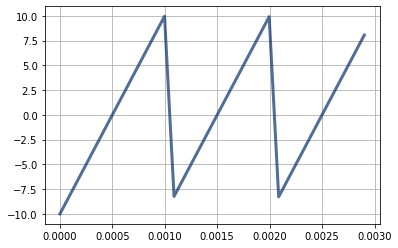

In [2]:
# Let's test what we have created
import matplotlib.pylab as pl

x= B0729036_SawtoothSignal(freq=1000)
x.plot()
pl.grid()

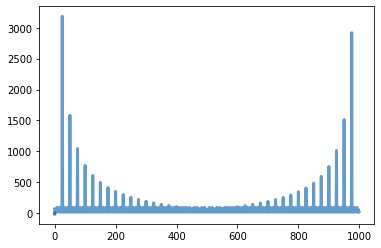

In [3]:
# see and hear it

w= x.make_wave()
w.segment(duration=.1).plot()
w.make_audio()

# make its spectrum

s= w.make_spectrum()
s.plot(high=1000)

# you will see the spectrum has both odd and even multiples of 1000 Hz